In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy import sparse
import gensim
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

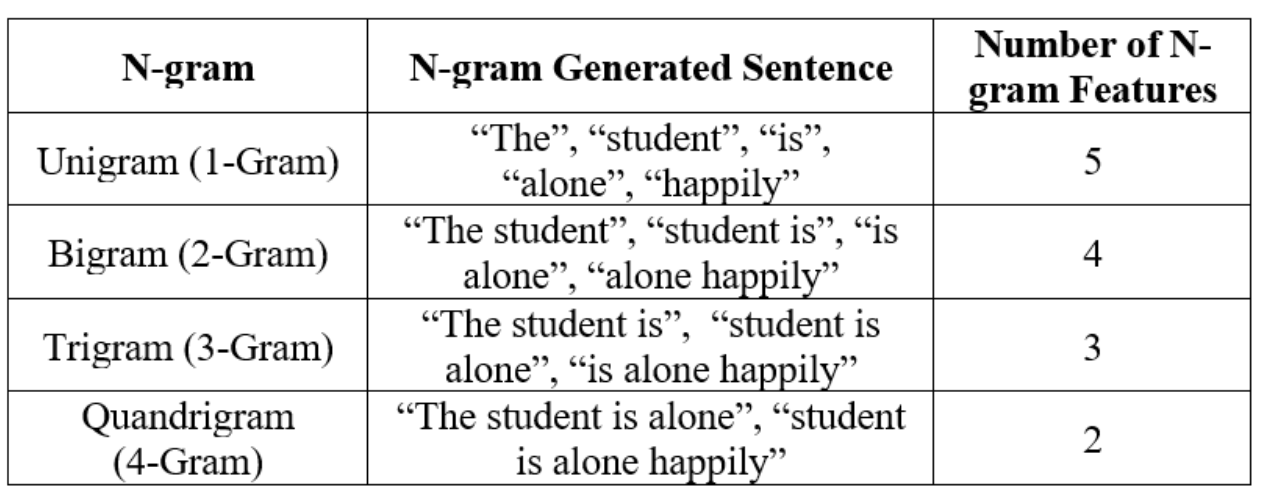

In [6]:
df=pd.read_csv("data/df.csv")

In [7]:
X=df["content"]
y=df["label"]

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF

In [162]:
vectorizations = [
    TfidfVectorizer(ngram_range=(1, 1)),
    TfidfVectorizer(ngram_range=(1, 2)),
    TfidfVectorizer(ngram_range=(1, 3)),
    TfidfVectorizer(ngram_range=(1, 4))
]


X_train_tf = [vectorization.fit_transform(X_train) for vectorization in vectorizations]
X_test_tf = [vectorization.transform(X_test) for vectorization in vectorizations]

In [9]:
import pickle
vectorization = TfidfVectorizer()
X_train=vectorization.fit_transform(X_train)
pickle.dump(vectorization, open("feature_extraction/vectorization.pickle", "wb"))

# Count vectorizer

In [163]:
# Count vectorizer
count_vectorizer = CountVectorizer()

# Count vectorization

X_train_count = count_vectorizer.fit_transform(X_train).toarray()
X_test_count = count_vectorizer.transform(X_test).toarray()

# Word Embedding 

In [272]:
sentence = df["content"].values
X = [d.split() for d in sentence.tolist()]

In [273]:
DIM = 100

In [274]:
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=5)

In [275]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [276]:
maxlen = 100
X = pad_sequences(X, maxlen=maxlen)
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [284]:
vocab_size

16380

## Word2Vec 

In [277]:
def get_weight_matrix(model):
    weight_matrix=np.zeros((vocab_size,DIM))
    
    for word,i in vocab.items():
        if word in model.wv:
            weight_matrix[i] = model.wv[word]
        
    return weight_matrix

In [278]:
embedding_vectors = get_weight_matrix(w2v_model)

In [234]:
# embedding_vectors.shape

## GloVe

In [279]:
# create embedding index
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [280]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [281]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
np.save('feature_extraction/X_train_tf.npy', X_train_tf)
np.save('feature_extraction/X_test_tf.npy', X_test_tf)
np.save('feature_extraction/X_train_count.npy', X_train_count)


np.save('feature_extraction/X_test_count.npy', X_test_count)
np.save('feature_extraction/y_train.npy', y_train)
np.save('feature_extraction/y_test.npy', y_test)

In [283]:
# Saving the embedding_matrix
np.save('feature_extraction/embedding_matrix_gv.npy', embedding_matrix)
np.save('feature_extraction/embedding_vectors_w2v.npy', embedding_vectors)
np.save('feature_extraction/X_test_d.npy', X_test_d)
np.save('feature_extraction/X_train_d.npy', X_train_d)
np.save('feature_extraction/y_test_d.npy', y_test_d)
np.save('feature_extraction/y_train_d.npy', y_train_d)